In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tifffile as tiff

In [2]:
import os

def count_tif_and_masks(root_folder):
    image_count = 0
    mask_count = 0
    
    # Traverse through all the subfolders and files in the root folder
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            # Check for .tif images
            if file.endswith('.tif') and 'mask' not in file.lower():
                image_count += 1
            # Check for .tif mask images
            elif file.endswith('.tif') and 'mask' in file.lower():
                mask_count += 1
                
    return image_count, mask_count

# Usage
root_folder = 'Data/Data'  # Replace with the path to your folder
image_count, mask_count = count_tif_and_masks(root_folder)

print(f"Number of .tif images: {image_count}")
print(f"Number of .tif masks: {mask_count}")

Number of .tif images: 3929
Number of .tif masks: 3929


In [3]:
def describe_tif_images(root_folder):
    # Traverse through all the subfolders and files in the root folder
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.tif'):
                file_path = os.path.join(subdir, file)
                
                # Open the image and describe its shape and bands
                with tiff.TiffFile(file_path) as tif:
                    image = tif.asarray()
                    shape = image.shape
                    
                    # Print description
                    if len(shape) == 2:
                        print(f"File: {file} | Shape: {shape} (Grayscale) | Bands: 1")
                    elif len(shape) == 3:
                        print(f"File: {file} | Shape: {shape[:2]} | Bands: {shape[2]}")
                    else:
                        print(f"File: {file} | Shape: {shape} | Unable to determine bands")

# Usage
root_folder = 'Data/tif'  # Replace with the path to your folder
describe_tif_images(root_folder)

File: TCGA_CS_4941_19960909_1.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_10.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_11.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_12.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_13.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_14.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_15.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_16.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_17.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_18.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_19.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_2.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_20.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_21.tif | Shape: (256, 256) | Bands: 3
File: TCGA_CS_4941_19960909_22.tif | Shape: (256, 256) | Bands: 3
File: TCGA_C

In [4]:
def describe_mask_tif_images(root_folder):
    # Traverse through all the subfolders and files in the root folder
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.tif') and 'mask' in file.lower():  # Filter for mask files
                file_path = os.path.join(subdir, file)
                
                # Open the mask file and describe its shape and bands
                with tiff.TiffFile(file_path) as tif:
                    mask = tif.asarray()
                    shape = mask.shape
                    
                    # Print description
                    if len(shape) == 2:
                        print(f"Mask File: {file} | Shape: {shape} (Grayscale) | Bands: 1")
                    elif len(shape) == 3:
                        print(f"Mask File: {file} | Shape: {shape[:2]} | Bands: {shape[2]}")
                    else:
                        print(f"Mask File: {file} | Shape: {shape} | Unable to determine bands")

# Usage
root_folder = 'Data/masks'  # Replace with the path to your folder
describe_mask_tif_images(root_folder)

Mask File: TCGA_CS_4941_19960909_10_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_11_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_12_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_13_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_14_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_15_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_16_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_17_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_18_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_19_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_1_mask.tif | Shape: (256, 256) (Grayscale) | Bands: 1
Mask File: TCGA_CS_4941_19960909_

In [5]:
def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """Apply CLAHE to an image."""
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    
    # Apply CLAHE for single channel images (grayscale)
    if len(image.shape) == 2:  # Grayscale image
        return clahe.apply(image)
    
    # Apply CLAHE for multi-channel images (e.g., RGB)
    elif len(image.shape) == 3:
        channels = cv2.split(image)
        clahe_channels = [clahe.apply(channel) for channel in channels]
        return cv2.merge(clahe_channels)

def preprocess_images_with_clahe(root_folder, output_folder):
    """Preprocess all .tif images with CLAHE and save the output."""
    os.makedirs(output_folder, exist_ok=True)

    for subdir, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.tif'):
                file_path = os.path.join(subdir, file)
                
                # Read the image using tifffile
                with tiff.TiffFile(file_path) as tif:
                    image = tif.asarray()

                    # Apply CLAHE preprocessing
                    processed_image = apply_clahe(image)

                    # Save the processed image to the output folder
                    output_file_path = os.path.join(output_folder, file)
                    tiff.imwrite(output_file_path, processed_image)
                    print(f"Processed and saved: {output_file_path}")

# Usage
root_folder = 'Data/tif'  # Replace with the folder containing original images
output_folder = 'Data/tif_clahe'  # Replace with the folder to save processed images

preprocess_images_with_clahe(root_folder, output_folder)

Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_1.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_10.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_11.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_12.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_13.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_14.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_15.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_16.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_17.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_18.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_19.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_2.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_20.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_21.tif
Processed and saved: Data/tif_clahe\TCGA_CS_4941_19960909_22.tif
Processed and saved: Data/t

In [6]:
def augment_and_normalize_preprocessed_images(images_folder, masks_folder, output_folder):
    """Augment and normalize preprocessed .tif images and masks, saving them in separate subfolders."""
    os.makedirs(os.path.join(output_folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, 'masks'), exist_ok=True)

    for subdir, _, files in os.walk(images_folder):
        for file in files:
            if file.endswith('.tif'):
                file_path = os.path.join(subdir, file)
                
                # Read the preprocessed image
                with tiff.TiffFile(file_path) as tif:
                    image = tif.asarray()
                    # Normalize the image
                    image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalization

                    # Apply augmentation (example: flipping)
                    augmented_image = np.flip(image, axis=1)  # Example augmentation

                    # Save the processed image
                    output_file_path = os.path.join(output_folder, 'images', file)
                    tiff.imwrite(output_file_path, augmented_image)
                    print(f"Processed and saved: {output_file_path}")

    for subdir, _, files in os.walk(masks_folder):
        for file in files:
            if file.endswith('.tif'):
                file_path = os.path.join(subdir, file)
                
                # Read the preprocessed mask
                with tiff.TiffFile(file_path) as tif:
                    mask = tif.asarray()
                    # Normalize the mask
                    mask = (mask - np.min(mask)) / (np.max(mask) - np.min(mask))  # Normalization

                    # Apply augmentation (example: flipping)
                    augmented_mask = np.flip(mask, axis=1)  # Example augmentation

                    # Save the processed mask
                    output_file_path = os.path.join(output_folder, 'masks', file)
                    tiff.imwrite(output_file_path, augmented_mask)
                    print(f"Processed and saved: {output_file_path}")

# Usage
images_folder = 'Data/tif_clahe'  # Folder containing preprocessed images
masks_folder = 'Data/masks'  # Folder containing preprocessed masks
output_folder = 'Data/augmented'  # Folder to save augmented images and masks

augment_and_normalize_preprocessed_images(images_folder, masks_folder, output_folder)

Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_1.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_10.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_11.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_12.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_13.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_14.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_15.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_16.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_17.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_18.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_19.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_2.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_20.tif
Processed and saved: Data/augmented\images\TCGA_CS_4941_19960909_2

C:\Users\tejes\AppData\Local\Temp\ipykernel_25928\419209992.py:34: RuntimeWarning: invalid value encountered in divide
  mask = (mask - np.min(mask)) / (np.max(mask) - np.min(mask))  # Normalization


Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_22_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_23_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_2_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_3_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_4_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_5_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_6_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_7_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_8_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4941_19960909_9_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4942_19970222_10_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4942_19970222_11_mask.tif
Processed and saved: Data/augmented\masks\TCGA_CS_4942_19970222_12_mask.tif
Processed and saved:

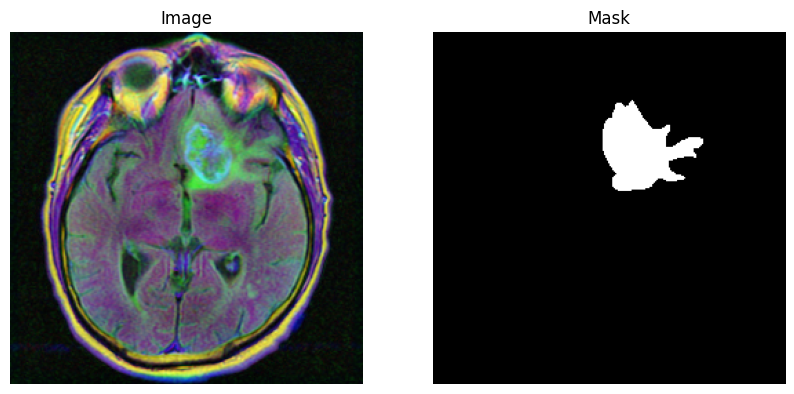

In [7]:
import matplotlib.pyplot as plt

def visualize_single_image_and_mask(image_path, mask_path):
    """Visualize a single image and its corresponding mask."""
    # Read the image and mask
    with tiff.TiffFile(image_path) as tif:
        image = tif.asarray()
    with tiff.TiffFile(mask_path) as tif:
        mask = tif.asarray()

    # Plotting
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.show()

# Usage
image_path = 'Data/augmented/images/TCGA_CS_4941_19960909_12.tif'  # Replace with the path to your image
mask_path = 'Data/augmented/masks/TCGA_CS_4941_19960909_12_mask.tif'  # Replace with the path to your mask

visualize_single_image_and_mask(image_path, mask_path)

In [8]:
def preprocess_for_unet(images_folder, masks_folder, output_folder, target_size=(256, 256)):
    """Preprocess augmented images and masks for U-Net++."""
    os.makedirs(os.path.join(output_folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, 'masks'), exist_ok=True)

    for subdir, _, files in os.walk(images_folder):
        for file in files:
            if file.endswith('.tif'):
                file_path = os.path.join(subdir, file)
                
                # Read the augmented image
                with tiff.TiffFile(file_path) as tif:
                    image = tif.asarray()
                    # Resize the image
                    image_resized = cv2.resize(image, target_size)
                    # Normalize the image
                    image_normalized = image_resized.astype(np.float32) / 255.0  # Normalize to [0, 1]

                    # Save the processed image
                    output_file_path = os.path.join(output_folder, 'images', file)
                    tiff.imwrite(output_file_path, image_normalized)
                    print(f"Processed and saved: {output_file_path}")

    for subdir, _, files in os.walk(masks_folder):
        for file in files:
            if file.endswith('.tif'):
                file_path = os.path.join(subdir, file)
                
                # Read the augmented mask
                with tiff.TiffFile(file_path) as tif:
                    mask = tif.asarray()
                    # Resize the mask
                    mask_resized = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)  # Use nearest for masks
                    # Normalize the mask
                    mask_normalized = mask_resized.astype(np.float32) / 255.0  # Normalize to [0, 1]

                    # Save the processed mask
                    output_file_path = os.path.join(output_folder, 'masks', file)
                    tiff.imwrite(output_file_path, mask_normalized)
                    print(f"Processed and saved: {output_file_path}")

# Usage
images_folder = 'Data/augmented/images'  # Folder containing augmented images
masks_folder = 'Data/augmented/masks'  # Folder containing augmented masks
output_folder = 'Data/preprocessed_unet'  # Folder to save preprocessed images and masks

preprocess_for_unet(images_folder, masks_folder, output_folder, target_size=(256, 256))

Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_1.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_10.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_11.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_12.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_13.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_14.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_15.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_16.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_17.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_18.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_19.tif
Processed and saved: Data/preprocessed_unet\images\TCGA_CS_4941_19960909_2.tif
Processed and saved: Data/preprocessed_une

In [9]:
import os
import tifffile as tiff

def print_shapes(images_folder, masks_folder):
    """Print the shape of a sample image and its corresponding mask."""
    # Get a sample image and mask file
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.tif')]
    mask_files = [f for f in os.listdir(masks_folder) if f.endswith('.tif')]

    if not image_files or not mask_files:
        print("No images or masks found in the specified folders.")
        return

    # Read the first image and mask
    sample_image_path = os.path.join(images_folder, image_files[0])
    sample_mask_path = os.path.join(masks_folder, mask_files[0])

    with tiff.TiffFile(sample_image_path) as tif:
        image = tif.asarray()
        print(f"Shape of sample image: {image.shape}")

    with tiff.TiffFile(sample_mask_path) as tif:
        mask = tif.asarray()
        print(f"Shape of sample mask: {mask.shape}")

# Usage
images_folder = 'Data/augmented/images'  # Folder containing preprocessed images
masks_folder = 'Data/augmented/masks'  # Folder containing preprocessed masks

print_shapes(images_folder, masks_folder)

Shape of sample image: (256, 256, 3)
Shape of sample mask: (256, 256)


In [13]:
import os
import shutil
import random

def split_data(image_folder, mask_folder, train_image_folder, train_mask_folder, test_image_folder, test_mask_folder, split_ratio=0.8):
    # Create the training and testing folders if they do not exist
    os.makedirs(train_image_folder, exist_ok=True)
    os.makedirs(train_mask_folder, exist_ok=True)
    os.makedirs(test_image_folder, exist_ok=True)
    os.makedirs(test_mask_folder, exist_ok=True)

    # Get list of all images and masks
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.tif')]
    mask_files = [f for f in os.listdir(mask_folder) if f.endswith('.tif')]

    # Ensure there are equal number of images and masks
    assert len(image_files) == len(mask_files), "The number of images and masks must be the same."

    # Shuffle the data
    combined = list(zip(image_files, mask_files))
    random.shuffle(combined)
    image_files[:], mask_files[:] = zip(*combined)

    # Calculate the number of training samples
    split_index = int(len(image_files) * split_ratio)

    # Split the files into training and testing sets
    train_images = image_files[:split_index]
    train_masks = mask_files[:split_index]
    test_images = image_files[split_index:]
    test_masks = mask_files[split_index:]

    # Move training images and masks to their respective folders
    for img, mask in zip(train_images, train_masks):
        shutil.copy(os.path.join(image_folder, img), os.path.join(train_image_folder, img))
        shutil.copy(os.path.join(mask_folder, mask), os.path.join(train_mask_folder, mask))

    # Move testing images and masks to their respective folders
    for img, mask in zip(test_images, test_masks):
        shutil.copy(os.path.join(image_folder, img), os.path.join(test_image_folder, img))
        shutil.copy(os.path.join(mask_folder, mask), os.path.join(test_mask_folder, mask))

# Usage
image_folder = 'Data/augmented/images'  # Folder containing processed images
mask_folder = 'Data/augmented/masks'    # Folder containing processed masks
train_image_folder = 'Data/train/images'  # Folder to save training images
train_mask_folder = 'Data/train/masks'    # Folder to save training masks
test_image_folder = 'Data/test/images'    # Folder to save testing images
test_mask_folder = 'Data/test/masks'      # Folder to save testing masks

split_data(image_folder, mask_folder, train_image_folder, train_mask_folder, test_image_folder, test_mask_folder)


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

def nested_unet(input_shape=(256, 256, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # Encoder block
    def encoder_block(x, filters):
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x

    # Nested block
    def nested_block(x, filters):
        skip = encoder_block(x, filters)
        x = layers.MaxPooling2D((2, 2))(skip)
        return skip, x

    # Encoder path
    skips = []
    x = inputs
    for filters in [32, 64, 128, 256]:
        skip, x = nested_block(x, filters)
        skips.append(skip)

    # Bottleneck
    x = encoder_block(x, 512)

    # Decoder path
    for i, filters in enumerate([256, 128, 64, 32]):
        x = layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(x)
        x = layers.concatenate([x, skips[-(i + 1)]])
        x = encoder_block(x, filters)

    # Output layer
    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(x)  # Use 'softmax' for multi-class

    model = models.Model(inputs, outputs)
    return model

# Usage
model = nested_unet(input_shape=(256, 256, 3), num_classes=1)  # For binary segmentation
# For multi-class segmentation, set num_classes to the number of classes
# model = nested_unet(input_shape=(256, 256, 3), num_classes=num_classes)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adjust loss for multi-class
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      9,248 │ re_lu[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │     36,928 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ re_lu_3[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_4[0][0]  

 Total params: 7,771,873 (29.65 MB)

 Trainable params: 7,765,985 (29.62 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [14]:
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

# Compile the model with DICE as an additional metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', dice_coefficient])

In [20]:
def load_data(images_folder, masks_folder):
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.tif')]
    mask_files = [f for f in os.listdir(masks_folder) if f.endswith('.tif')]
    
    images = []
    masks = []
    
    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(images_folder, img_file)
        mask_path = os.path.join(masks_folder, mask_file)
        
        try:
            # Load the image
            with tiff.TiffFile(img_path) as tif:
                image = tif.asarray()
                # Ensure the image is resized to (256, 256, 3)
                if image.shape[-1] == 1:  # If grayscale, convert to RGB
                    image = np.repeat(image, 3, axis=-1)  # Convert to RGB by repeating the channel
                image = np.resize(image, (256, 256, 3))  # Resize to the desired shape
                images.append(image)

            # Load the mask
            with tiff.TiffFile(mask_path) as tif:
                mask = tif.asarray()
                # Resize the mask to (256, 256)
                mask = np.resize(mask, (256, 256))  # Resize to the desired shape
                masks.append(mask)

        except Exception as e:
            print(f"Error loading image: {img_path}, Error: {e}")

    return np.array(images), np.array(masks)

# Load your images and masks
images_folder = 'Data/augmented/images'  # Folder containing preprocessed images
masks_folder = 'Data/augmented/masks'  # Folder containing preprocessed masks
X, y = load_data(images_folder, masks_folder)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Training masks shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Validation masks shape: {y_val.shape}")

MemoryError: Unable to allocate 5.76 GiB for an array with shape (3929, 256, 256, 3) and data type float64

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

def attention_block(x, g, filters):
    """Attention block for Attention U-Net."""
    theta_x = layers.Conv2D(filters, (1, 1), strides=(1, 1), padding='same')(x)
    theta_x = layers.BatchNormalization()(theta_x)

    theta_g = layers.Conv2D(filters, (1, 1), strides=(1, 1), padding='same')(g)
    theta_g = layers.BatchNormalization()(theta_g)

    # Add and apply activation
    phi = layers.add([theta_x, theta_g])
    phi = layers.Activation('relu')(phi)

    # Apply convolution to get attention coefficients
    psi = layers.Conv2D(1, (1, 1), strides=(1, 1), padding='same')(phi)
    psi = layers.Activation('sigmoid')(psi)

    # Apply attention coefficients to the input feature map
    return layers.multiply([x, psi])

def attention_unet(input_shape=(256, 256, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    def encoder_block(x, filters):
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x

    # Nested block
    def nested_block(x, filters):
        skip = encoder_block(x, filters)
        x = layers.MaxPooling2D((2, 2))(skip)
        return skip, x

    # Encoder path
    skips = []
    x = inputs
    for filters in [32, 64, 128, 256]:
        skip, x = nested_block(x, filters)
        skips.append(skip)

    # Bottleneck
    x = encoder_block(x, 512)

    # Decoder path with attention
    for i, filters in enumerate([256, 128, 64, 32]):
        x = layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(x)
        # Apply attention block
        x = attention_block(x, skips[-(i + 1)], filters)
        x = encoder_block(x, filters)

    # Output layer
    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(x)  # Use 'softmax' for multi-class

    model = models.Model(inputs, outputs)
    return model

# Usage
model = attention_unet(input_shape=(256, 256, 3), num_classes=1)  # For binary segmentation
# For multi-class segmentation, set num_classes to the number of classes
# model = attention_unet(input_shape=(256, 256, 3), num_classes=num_classes)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 256, 256,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_18 (ReLU)     │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 256, 256,  │      9,248 │ re_lu_18[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_19 (ReLU)     │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ re_lu_19[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_20 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │     36,928 │ re_lu_20[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_22[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_21 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ re_lu_21[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_23[0][0] 

 Total params: 7,167,877 (27.34 MB)

 Trainable params: 7,160,069 (27.31 MB)

 Non-trainable params: 7,808 (30.50 KB)

In [22]:
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    """Calculate the Dice coefficient."""
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    """Calculate the Dice loss."""
    return 1 - dice_coefficient(y_true, y_pred)

In [23]:
# Usage
model = attention_unet(input_shape=(256, 256, 3), num_classes=1)  # For binary segmentation

# Compile the model with Dice loss and accuracy
model.compile(optimizer='adam', 
              loss=dice_loss,  # Use Dice loss
              metrics=['accuracy', dice_coefficient])  # Add Dice coefficient as a metric

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 256, 256,  │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_50[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_36 (ReLU)     │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 256, 256,  │      9,248 │ re_lu_36[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_51[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_37 (ReLU)     │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ re_lu_37[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_52[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_38 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 128, 128,  │     36,928 │ re_lu_38[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_53[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_39 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ re_lu_39[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_9[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_54[0][0] 

 Total params: 7,167,877 (27.34 MB)

 Trainable params: 7,160,069 (27.31 MB)

 Non-trainable params: 7,808 (30.50 KB)

In [28]:
model_checkpoint = ModelCheckpoint('attention_unet_best_model.h5', save_best_only=True)

# Start training
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,  # Adjust the number of epochs as needed
                    batch_size=16,  # Adjust the batch size as needed
                    callbacks=[model_checkpoint])

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=attention_unet_best_model.h5

In [27]:
# Define model checkpoint
model_checkpoint = ModelCheckpoint('attention_unet_best_model.keras', save_best_only=True)

In [1]:
import numpy as np
import os
import tifffile as tiff
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# Load your data
def load_data(images_folder, masks_folder):
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.tif')]
    mask_files = [f for f in os.listdir(masks_folder) if f.endswith('.tif')]
    
    images = []
    masks = []
    
    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(images_folder, img_file)
        mask_path = os.path.join(masks_folder, mask_file)
        
        try:
            # Load the image
            with tiff.TiffFile(img_path) as tif:
                image = tif.asarray()
                # Ensure the image is resized to (256, 256, 3)
                if image.shape[-1] == 1:  # If grayscale, convert to RGB
                    image = np.repeat(image, 3, axis=-1)  # Convert to RGB by repeating the channel
                image = np.resize(image, (256, 256, 3))  # Resize to the desired shape
                images.append(image)

            # Load the mask
            with tiff.TiffFile(mask_path) as tif:
                mask = tif.asarray()
                # Resize the mask to (256, 256)
                mask = np.resize(mask, (256, 256))  # Resize to the desired shape
                masks.append(mask)

        except Exception as e:
            print(f"Error loading image: {img_path}, Error: {e}")

    return np.array(images), np.array(masks)

# Load your images and masks
images_folder = 'Data/augmented/images'  # Folder containing preprocessed images
masks_folder = 'Data/augmented/masks'  # Folder containing preprocessed masks
X, y = load_data(images_folder, masks_folder)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Training masks shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Validation masks shape: {y_val.shape}")

# Define the Attention U-Net model
def attention_block(x, g, filters):
    """Attention block for Attention U-Net."""
    theta_x = layers.Conv2D(filters, (1, 1), strides=(1, 1), padding='same')(x)
    theta_x = layers.BatchNormalization()(theta_x)

    theta_g = layers.Conv2D(filters, (1, 1), strides=(1, 1), padding='same')(g)
    theta_g = layers.BatchNormalization()(theta_g)

    # Add and apply activation
    phi = layers.add([theta_x, theta_g])
    phi = layers.Activation('relu')(phi)

    # Apply convolution to get attention coefficients
    psi = layers.Conv2D(1, (1, 1), strides=(1, 1), padding='same')(phi)
    psi = layers.Activation('sigmoid')(psi)

    # Apply attention coefficients to the input feature map
    return layers.multiply([x, psi])

def attention_unet(input_shape=(256, 256, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    def encoder_block(x, filters):
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x

    # Nested block
    def nested_block(x, filters):
        skip = encoder_block(x, filters)
        x = layers.MaxPooling2D((2, 2))(skip)
        return skip, x

    # Encoder path
    skips = []
    x = inputs
    for filters in [32, 64, 128, 256]:
        skip, x = nested_block(x, filters)
        skips.append(skip)

    # Bottleneck
    x = encoder_block(x, 512)

    # Decoder path with attention
    for i, filters in enumerate([256, 128, 64, 32]):
        x = layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(x)
        # Apply attention block
        x = attention_block(x, skips[-(i + 1)], filters)
        x = encoder_block(x, filters)

    # Output layer
    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(x)  # Use 'softmax' for multi-class

    model = models.Model(inputs, outputs)
    return model

# Create the model
model = attention_unet(input_shape=(256, 256, 3), num_classes=1)  # For binary segmentation

# Define Dice coefficient and loss
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    """Calculate the Dice coefficient."""
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    """Calculate the Dice loss."""
    return 1 - dice_coefficient(y_true, y_pred)

# Compile the model with Dice loss and accuracy
model.compile(optimizer='adam', 
              loss=dice_loss,  # Use Dice loss
              metrics=['accuracy', dice_coefficient])  # Add Dice coefficient as a metric

# Define model checkpoint
model_checkpoint = ModelCheckpoint('attention_unet_best_model.keras', save_best_only=True)

# Start training
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,  # Adjust the number of epochs as needed
                    batch_size=16,  # Adjust the batch size as needed
                    callbacks=[model_checkpoint])

Training data shape: (3143, 256, 256, 3), Training masks shape: (3143, 256, 256)
Validation data shape: (786, 256, 256, 3), Validation masks shape: (786, 256, 256)


MemoryError: Unable to allocate 2.30 GiB for an array with shape (3143, 256, 256, 3) and data type float32